<a href="https://colab.research.google.com/github/manoelakohler/AnomalyDetection/blob/main/AnomalyDetection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Detecção de Anomalias Utilizando Autoencoders


##Carregar dataset

In [ ]:
# Importar bibliotecas
import numpy as np
import random
import pandas as pd
import tensorflow
import matplotlib.pyplot as plt
import seaborn as sns

#semente inicial
seed=10
np.random.seed(seed) 
random.seed(seed)
tensorflow.random.set_seed(seed)

In [ ]:
# Carregar base de dados
# https://www.kaggle.com/datasets/devavratatripathy/ecg-dataset
data = pd.read_csv('ecg.csv', header=None)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,-0.112522,-2.827204,-3.773897,-4.349751,-4.376041,-3.474986,-2.181408,-1.818286,-1.250522,-0.477492,...,0.792168,0.933541,0.796958,0.578621,0.257740,0.228077,0.123431,0.925286,0.193137,1.0
1,-1.100878,-3.996840,-4.285843,-4.506579,-4.022377,-3.234368,-1.566126,-0.992258,-0.754680,0.042321,...,0.538356,0.656881,0.787490,0.724046,0.555784,0.476333,0.773820,1.119621,-1.436250,1.0
2,-0.567088,-2.593450,-3.874230,-4.584095,-4.187449,-3.151462,-1.742940,-1.490659,-1.183580,-0.394229,...,0.886073,0.531452,0.311377,-0.021919,-0.713683,-0.532197,0.321097,0.904227,-0.421797,1.0
3,0.490473,-1.914407,-3.616364,-4.318823,-4.268016,-3.881110,-2.993280,-1.671131,-1.333884,-0.965629,...,0.350816,0.499111,0.600345,0.842069,0.952074,0.990133,1.086798,1.403011,-0.383564,1.0
4,0.800232,-0.874252,-2.384761,-3.973292,-4.338224,-3.802422,-2.534510,-1.783423,-1.594450,-0.753199,...,1.148884,0.958434,1.059025,1.371682,1.277392,0.960304,0.971020,1.614392,1.421456,1.0


In [ ]:
data.shape

(4998, 141)

In [ ]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
count,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,...,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000,4998.000000
mean,-0.262502,-1.649828,-2.492623,-3.119754,-3.167656,-2.866306,-2.272845,-1.797754,-1.409784,-0.935806,...,0.071312,-0.062622,-0.276086,-0.507750,-0.761323,-0.835173,-0.642739,-0.487667,-0.706574,0.584034
std,1.152450,1.445542,1.386457,1.302921,1.104535,0.906312,0.731594,0.622794,0.636863,0.657788,...,1.404425,1.646105,1.894515,2.059366,2.086130,2.056296,1.859409,1.831088,1.414414,0.492937
min,-6.729499,-7.090374,-5.132459,-5.363241,-5.375715,-5.330194,-4.782240,-4.311288,-4.071361,-4.142476,...,-4.167040,-4.557576,-4.530488,-4.563270,-5.150100,-4.880460,-5.496107,-5.880890,-6.092227,0.000000
25%,-1.004220,-2.701936,-3.668585,-4.227337,-4.007630,-3.480666,-2.779832,-2.165808,-1.773870,-1.362003,...,-1.087720,-1.588237,-2.146835,-2.730750,-3.031224,-2.868603,-2.154560,-1.658289,-1.596809,0.000000
50%,-0.297541,-1.661892,-2.586129,-3.388210,-3.469899,-2.947061,-2.285427,-1.750084,-1.422457,-0.910384,...,0.658318,0.717808,0.604747,0.334857,-0.030767,-0.195151,-0.194423,-0.160262,-0.568443,1.000000
75%,0.499909,-0.677998,-1.514187,-2.235690,-2.531153,-2.398797,-1.823480,-1.484107,-1.063592,-0.476477,...,1.169392,1.238651,1.264379,1.234408,1.033957,0.945027,0.951621,1.002628,0.271635,1.000000
max,4.966414,3.479689,2.660597,1.899798,2.147015,1.614375,1.868728,1.804251,1.683730,1.898627,...,3.007606,2.854680,2.912394,2.937685,3.351437,3.432519,3.579448,4.425976,7.402103,1.000000


Label:
- 0 = anomalia
- 1 = normal

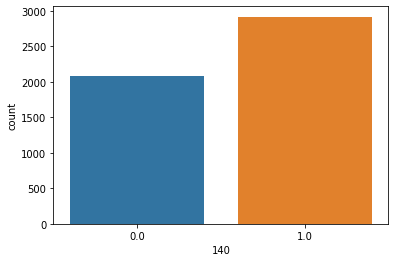

In [ ]:
label_column = data.shape[1]-1
sns.countplot(x=data[label_column]);

##Separar em anomalia e normal 

In [ ]:
data_normal = data[data[label_column] == 1]
X_normal = data_normal.iloc[:,0:label_column]
y_normal = data_normal[label_column]

data_anomaly = data[data[label_column] == 0]
X_anomaly = data_anomaly.iloc[:,0:label_column]
y_anomaly = data_anomaly.iloc[:,label_column]

print(data_normal.shape)
print(data_anomaly.shape)

(2919, 141)
(2079, 141)


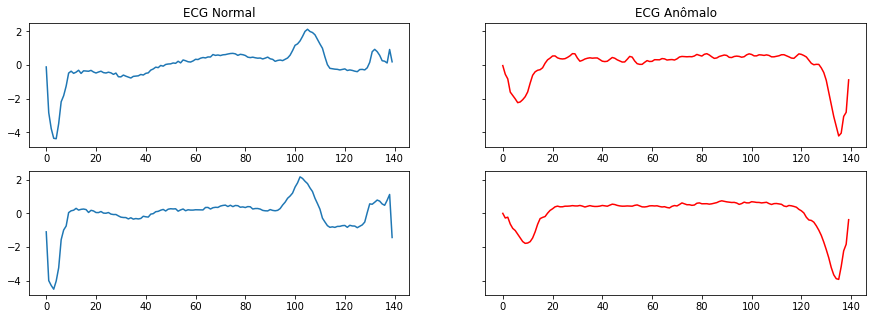

In [ ]:
# plotar dois gráficos de ecg de cada (normal e anomalia)
normal_example_1 = X_normal.iloc[0,:]
normal_example_2 = X_normal.iloc[1,:]
anomalous_example_1 = X_anomaly.iloc[0,:]
anomalous_example_2 = X_anomaly.iloc[1,:]

f, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharey=True, figsize=(15,5))

ax1.plot(np.array(range(len(normal_example_1))), normal_example_1)
ax3.plot(np.array(range(len(normal_example_2))), normal_example_2)
ax1.set_title('ECG Normal')

ax2.plot(np.array(range(len(anomalous_example_1))), anomalous_example_1, color='red')
ax4.plot(np.array(range(len(anomalous_example_2))), anomalous_example_2, color='red')
ax2.set_title('ECG Anômalo')

plt.show()

##Separar base normal em treino e teste

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_normal, y_normal, test_size=0.2, stratify=y_normal)

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(2335, 140)
(584, 140)
(2335,)
(584,)


##Normalizar

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

##Arquitetura Autoencoder

In [ ]:
from keras.layers import Input, Dense, Dropout
from keras.models import Model
from tensorflow.keras.optimizers import Adam

encoding_dim = 8
input_shape = X_train.shape[1]

input = Input(shape=input_shape)

# Encoder
encoding1 = Dense(64, activation='relu')(input)
dropout1 = Dropout(0.1)(encoding1)

encoding2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(encoding2)

encoding3 = Dense(16, activation='relu')(dropout2)
dropout3 = Dropout(0.1)(encoding3)

# camada latente
encoder = Dense(encoding_dim, activation='relu')(dropout3)

# Decoder
decoding1 = Dense(16, activation='relu')(encoder)
dropout1 = Dropout(0.1)(decoding1)

decoding2 = Dense(32, activation='relu')(dropout1)
dropout2 = Dropout(0.1)(decoding2)

decoding3 = Dense(64, activation='relu')(dropout2)
dropout3 = Dropout(0.1)(decoding3)

decoder = Dense(input_shape, activation='sigmoid')(dropout3)

# this model maps an input to its reconstruction
autoencoder = Model(input, decoder)

autoencoder.compile(optimizer=Adam(0.01), loss='mse', metrics=['rmse'])
autoencoder.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 140)]             0         
                                                                 
 dense (Dense)               (None, 64)                9024      
                                                                 
 dropout (Dropout)           (None, 64)                0         
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dropout_1 (Dropout)         (None, 32)                0         
                                                                 
 dense_2 (Dense)             (None, 16)                528       
                                                                 
 dropout_2 (Dropout)         (None, 16)                0     

##Treinar modelo

In [ ]:
history = autoencoder.fit(X_train, X_train, epochs=100, batch_size=512, validation_data=(X_test, X_test))

Epoch 1/100
5/5 [==============================] - 1s 59ms/step - loss: 0.0221 - mse: 0.0221 - val_loss: 0.0124 - val_mse: 0.0124
Epoch 2/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0107 - val_mse: 0.0107
Epoch 3/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0116 - mse: 0.0116 - val_loss: 0.0104 - val_mse: 0.0104
Epoch 4/100
5/5 [==============================] - 0s 16ms/step - loss: 0.0112 - mse: 0.0112 - val_loss: 0.0102 - val_mse: 0.0102
Epoch 5/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0108 - mse: 0.0108 - val_loss: 0.0098 - val_mse: 0.0098
Epoch 6/100
5/5 [==============================] - 0s 13ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0093 - val_mse: 0.0093
Epoch 7/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0101 - mse: 0.0101 - val_loss: 0.0089 - val_mse: 0.0089
Epoch 8/100
5/5 [==============================] - 0s 14ms/step - loss: 0.0097 - mse: 0.00

##Avaliar erro no treino e validação durante processo de treinamento

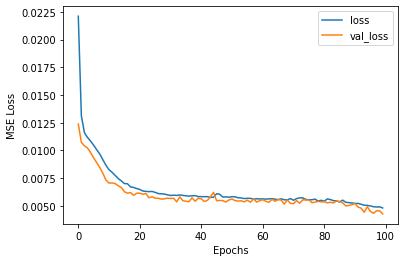

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.xlabel('Epochs')
plt.ylabel('MSE Loss')
plt.legend(['treino', 'validação'])
plt.show()

##Avaliar uma previsão específica

Normal - reconstrução

In [ ]:
output = autoencoder.predict(X_test[0:1,:])
matrix = np.vstack([X_test[0:1,:],output])
df = pd.DataFrame(matrix)
df.shape

(2, 140)

In [ ]:
# as cores por coluna devem ser mais próximas o possível: isso siginifica que os valores são próximos, e a reconstrução foi bem feita.
df.style.background_gradient(cmap="YlOrBr", axis=1)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139
0,0.500190,0.359813,0.108323,0.170265,0.248754,0.386771,0.468516,0.466968,0.450682,0.466673,0.455422,0.438040,0.471615,0.443923,0.444856,0.454551,0.439725,0.440130,0.423938,0.419815,0.407737,0.404139,0.408208,0.424077,0.411484,0.383743,0.378277,0.375362,0.351575,0.347734,0.342191,0.310504,0.281325,0.465119,0.340359,0.327934,0.360937,0.376910,0.379066,0.397814,0.395128,0.389851,0.338906,0.401643,0.500711,0.409043,0.378995,0.428571,0.432416,0.410684,0.474623,0.689420,0.694172,0.589401,0.468343,0.531125,0.488509,0.564906,0.649081,0.472991,0.480676,0.619827,0.655439,0.493421,0.419920,0.567535,0.656646,0.636394,0.667906,0.710454,0.692874,0.574558,0.531643,0.600650,0.647189,0.709644,0.789826,0.765353,0.688630,0.648186,0.647101,0.588639,0.476140,0.447173,0.405913,0.413718,0.451728,0.444453,0.476386,0.480393,0.505852,0.599764,0.672947,0.609260,0.650558,0.612287,0.614970,0.612444,0.688201,0.763441,0.815407,0.859927,0.840029,0.804494,0.797945,0.685299,0.651849,0.594160,0.576801,0.474279,0.390718,0.312685,0.305109,0.346025,0.335384,0.359873,0.438448,0.408845,0.436208,0.474363,0.503886,0.531589,0.529245,0.466663,0.576398,0.663531,0.686862,0.691372,0.705022,0.684141,0.668811,0.566817,0.628158,0.638628,0.598619,0.565041,0.653640,0.749280,0.670266,0.411161
1,0.487501,0.412808,0.213371,0.212939,0.232046,0.304288,0.348796,0.422457,0.399229,0.351602,0.424121,0.430829,0.449359,0.457705,0.447555,0.451050,0.447765,0.437292,0.419535,0.415505,0.418099,0.407820,0.426487,0.436284,0.430191,0.410412,0.407264,0.389737,0.377152,0.370186,0.361572,0.326568,0.337335,0.499194,0.363500,0.394491,0.412370,0.412891,0.425995,0.424968,0.421846,0.417395,0.360235,0.427263,0.518432,0.415155,0.387226,0.414760,0.430396,0.437435,0.513652,0.708054,0.693123,0.644355,0.486377,0.539971,0.489497,0.561859,0.593236,0.448951,0.508009,0.586844,0.641523,0.493266,0.395780,0.528402,0.593099,0.624873,0.596189,0.628500,0.648524,0.514070,0.476423,0.562915,0.595580,0.656509,0.692921,0.719227,0.685397,0.643759,0.623770,0.573410,0.487012,0.460254,0.427963,0.405333,0.447210,0.452914,0.489136,0.482376,0.507237,0.602213,0.679165,0.613577,0.641939,0.608162,0.603924,0.616890,0.675494,0.730384,0.775267,0.803136,0.833177,0.786369,0.786293,0.688842,0.647784,0.625536,0.594939,0.509031,0.445120,0.387929,0.366419,0.372103,0.396274,0.419276,0.478183,0.446533,0.465380,0.495539,0.526786,0.569129,0.593664,0.529494,0.648399,0.695141,0.726136,0.722954,0.704175,0.666949,0.683776,0.610099,0.617675,0.582094,0.554718,0.506286,0.539485,0.617700,0.621648,0.477808


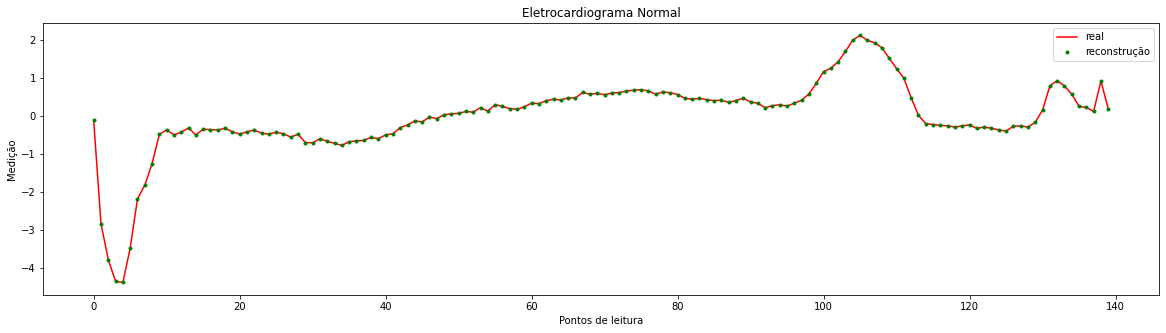

In [ ]:
# Gráfico da comparação entre real e previsto reconstruído
idx_amostra = 0  # se quiser pegar outra amostra para analisar é só mudar esse índice
normal_example = np.array(X_normal.iloc[idx_amostra,:])
normal_example_scaled = scaler.transform(normal_example.reshape(1, -1))
normal_reconstruction_scaled = autoencoder.predict(normal_example_scaled) 
normal_reconstruction = scaler.inverse_transform(normal_example_scaled).squeeze()

plt.figure(figsize=(20,5))

plt.plot(np.array(range(len(normal_example))), normal_example, color='red', label='real')
plt.plot(np.array(range(len(normal_example))), normal_reconstruction, 'g.', label='reconstrução')

plt.title('Eletrocardiograma Normal')
plt.xlabel('Pontos de leitura')
plt.ylabel('Medição')
plt.legend()
plt.show()

##Avaliar erros em dados anômalos (todos) e normais (de teste)

In [ ]:
X_anomaly_scaled = scaler.transform(X_anomaly)

normal_reconstructions = autoencoder.predict(X_test)
anomaly_reconstructions = autoencoder.predict(X_anomaly_scaled)

normal_erros = tensorflow.keras.losses.mse(normal_reconstructions, X_test)
anomaly_erros = tensorflow.keras.losses.mse(anomaly_reconstructions, X_anomaly_scaled)

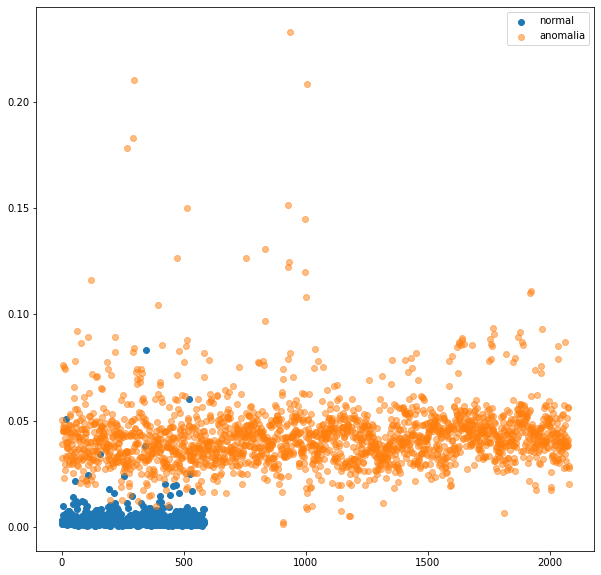

In [ ]:
# Plot dos erros
plt.figure(figsize=(10,10))
plt.scatter(x=range(len(normal_erros)), y=normal_erros, label='normal')
plt.scatter(x=range(len(anomaly_erros)), y=anomaly_erros, label='anomalia', alpha=0.5)
plt.legend()
plt.show()

In [ ]:
# definir o limiar entre erros de dados anômalos e normais
def find_threshold(model, data):
  reconstructions = model.predict(data)
  reconstruction_errors = tensorflow.keras.losses.mse(reconstructions, data)
  threshold = np.mean(reconstruction_errors.numpy()) + np.std(reconstruction_errors.numpy())
  return threshold

# retonar predições (0 ou 1) baseado no erro
def get_predictions(model, data, threshold):
  predictions = model.predict(data)
  errors = tensorflow.keras.losses.mse(predictions, data)
  anomaly_mask = pd.Series(errors) > threshold
  preds = anomaly_mask.map(lambda x: 0.0 if x == True else 1.0)
  return preds

In [ ]:
# Limiar definido
threshold = find_threshold(autoencoder, X_train)
print(f"Threshold method one: {threshold}")

Threshold method one: 0.009766951802600322


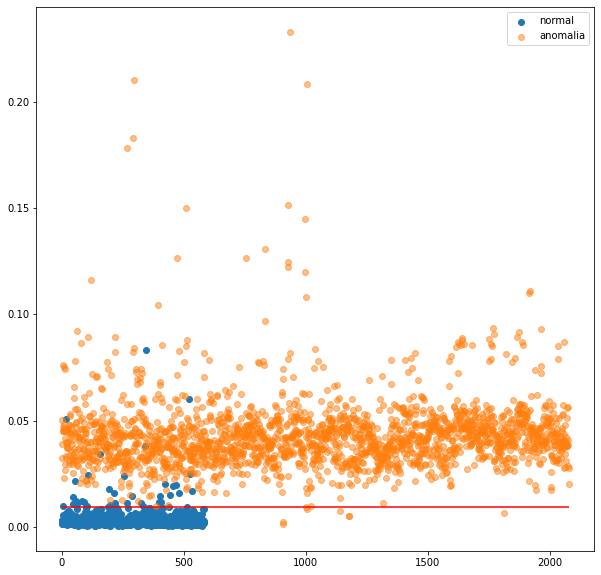

In [ ]:
# Plot dos erros e do limiar
plt.figure(figsize=(10,10))
plt.scatter(x=range(len(normal_erros)), y=normal_erros, label='normal')
plt.scatter(x=range(len(anomaly_erros)), y=anomaly_erros, label='anomalia', alpha=0.5)
plt.hlines(threshold, xmin=0, xmax=max(len(normal_erros), len(anomaly_erros)), color='red')
plt.legend()
plt.show()

##Avaliar classificações

In [ ]:
all_data = np.vstack([X_test, X_anomaly_scaled])
out = np.hstack([y_test, y_anomaly])

Acurácia:  0.984228313931656
Kappa:  0.9531907983671228
F1 score:  0.9632224168126093


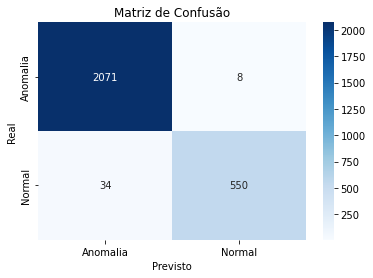

In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, cohen_kappa_score, f1_score

def predict_and_evaluate(model, inputs, outputs, threshold):
  preds = get_predictions(model, inputs, threshold)

  print('Acurácia: ', accuracy_score(outputs, preds))
  print('Kappa: ', cohen_kappa_score(outputs, preds) )
  print('F1 score: ', f1_score(outputs, preds))  
  
  confMatrix = confusion_matrix(outputs, preds)

  import seaborn as sns
  ax = plt.subplot()
  sns.heatmap(confMatrix, annot=True, fmt=".0f", cmap=plt.cm.Blues)
  plt.xlabel('Previsto')
  plt.ylabel('Real')
  plt.title('Matriz de Confusão')

  # Colocar as classes
  ax.xaxis.set_ticklabels(['Anomalia', 'Normal']) 
  ax.yaxis.set_ticklabels(['Anomalia', 'Normal'])
  plt.show()

predict_and_evaluate(autoencoder, all_data, out, threshold)